In [87]:
#Section Analysis done by Grant Huie
import pandas as pd
import matplotlib.pyplot as plt
import gym
import random
import re

with open('/Users/tinhat/Desktop/atarirl/DQN/wandb/run-20230411_192229-svmp35lo/files/output.log', 'r') as f:
    lines = f.readlines()

data = {'global_step': [], 'episodic_return': []}

for line in lines:
    match = re.search(r'global_step=(\d+), episodic_return=(-?\d+\.\d+)', line)
    if match:
        global_step = match.group(1)
        episodic_return = match.group(2)
        data['global_step'].append(global_step)
        data['episodic_return'].append(episodic_return)

df = pd.DataFrame(data)
print(df)

     global_step episodic_return
0            183        -31700.0
1            362        -50000.0
2            540        -13100.0
3            724        -30100.0
4            909        -29000.0
...          ...             ...
2754      499230             0.0
2755      499411          -600.0
2756      499589             0.0
2757      499769          -600.0
2758      499950             0.0

[2759 rows x 2 columns]


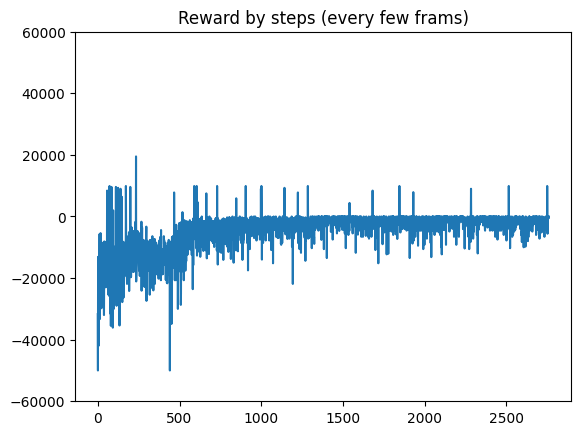

In [88]:
## At the start of the game, you will have $50,000 and 60 units of time. Your end game score with be dependent on how much time you have remaining and who you encounter along the way.
df['episodic_return'] = pd.to_numeric(df['episodic_return'])
df['episodic_return'].plot()
plt.title('Reward by steps (every few frams)')
plt.ylim(-60000, 60000)
plt.show()

In [100]:
df = pd.read_csv("/Users/tinhat/Desktop/atarirl/DQN/wandb/run-20230411_192229-svmp35lo/files/results2.log", delimiter=", ")
df.rename(columns={'1': 'eval_episode', '2': 'episodic_return'}, inplace=True)
df

/var/folders/nq/fkm3plwd7zg_5qqw9d23dtb40000gn/T/ipykernel_68888/1444794130.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/Users/tinhat/Desktop/atarirl/DQN/wandb/run-20230411_192229-svmp35lo/files/results2.log", delimiter=", ")


,eval_episode,episodic_return
0,0,-2900.0
1,1,-300.0
2,2,-1200.0
3,3,-4900.0
4,4,0.0
5,5,-1200.0
6,6,-3200.0
7,7,-7000.0
8,8,-600.0
9,9,0.0


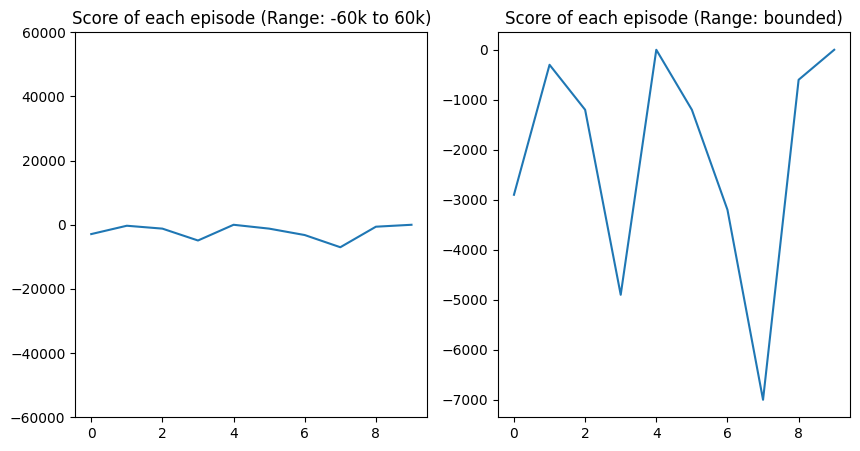

In [101]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first set of data on the first subplot
df['episodic_return'].plot(ax=ax1)
ax1.set_title('Score of each episode (Range: -60k to 60k)')
ax1.set_ylim(-60000, 60000)

# Plot the second set of data on the second subplot
df['episodic_return'].plot(ax=ax2)
ax2.set_title('Score of each episode (Range: bounded)')

# Display the plots
plt.show()

In [102]:
df = pd.read_csv("/Users/tinhat/Desktop/atarirl/DQN/wandb/run-20230411_192229-svmp35lo/files/randomResults1.log", delimiter=", ")
df.rename(columns={'1': 'eval_episode', '2': 'episodic_return'}, inplace=True)
df

/var/folders/nq/fkm3plwd7zg_5qqw9d23dtb40000gn/T/ipykernel_68888/2714267776.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/Users/tinhat/Desktop/atarirl/DQN/wandb/run-20230411_192229-svmp35lo/files/randomResults1.log", delimiter=", ")


,eval_episode,episodic_return
0,0,-24200.0
1,1,-19600.0
2,2,-17600.0
3,3,-30100.0
4,4,-23200.0
5,5,-12900.0
6,6,-19300.0
7,7,-14100.0
8,8,-7500.0
9,9,-20100.0


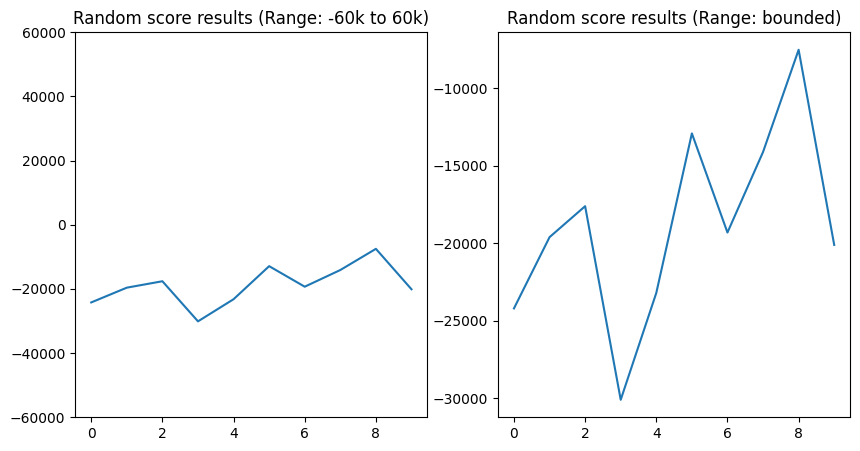

In [103]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first set of data on the first subplot
df['episodic_return'].plot(ax=ax1)
ax1.set_title('Random score results (Range: -60k to 60k)')
ax1.set_ylim(-60000, 60000)

# Plot the second set of data on the second subplot
df['episodic_return'].plot(ax=ax2)
ax2.set_title('Random score results (Range: bounded)')

# Display the plots
plt.show()